In [536]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [537]:
# Build a dataframe with your connections
bess_association= pd.read_csv("Association_data-only-para-text.csv",engine='python')

In [538]:
bess_association.item_A = bess_association.item_A.str.replace("xxspacexx"," ").str.replace("xxeosxx",":").str.replace("xyz","-")
bess_association.item_B = bess_association.item_B.str.replace("xxspacexx"," ").str.replace("xxeosxx",":").str.replace("xyz","-")

### Selecting top associations for a parsona

In [555]:
persona = 'victoria'

bess_persona = bess_association[((bess_association.item_A.str.contains(persona)) |
                                (bess_association.item_B.str.contains(persona))) & (bess_association.freqAB > 5)]

In [561]:
stage_of_life = False
if(stage_of_life):
    flag = bess_persona.item_A.str.len() < bess_persona.item_B.str.len()
    bess_persona.loc[flag,['item_A','item_B']] = bess_persona.loc[flag,['item_B','item_A']]
    
    bess_persona_groups = bess_persona.groupby('item_A').head(10).sort_values(['item_A','lift'])
    bess_persona_groups['stage_of_life'] = bess_persona_groups.item_A.str.split(":").apply(lambda x: x[1]).str.split("-").apply(lambda x:x[-1])
    bess_persona_groups['persona'] = bess_persona_groups.item_A.str.split(":").apply(lambda x: x[0])

    #bess_persona_groups.item_A.str.split(":").apply(lambda x: x[1])
else:
    bess_persona_groups = bess_persona

In [562]:
bess_persona.sort_values(['lift'],ascending=False).head()

,Unnamed: 0,item_A,item_B,freqAB,supportAB,freqA,supportA,freqB,supportB,confidenceAtoB,confidenceBtoA,lift
20761,3262746,victorian,era,8,0.048429,16,0.096858,54,0.326896,0.500000,0.148148,1.529537
22110,3376560,william iv,princess victoria,6,0.036322,22,0.133180,31,0.187663,0.272727,0.193548,1.453284
40647,3262726,victoria,woodhull,11,0.066590,100,0.605364,21,0.127126,0.110000,0.523810,0.865281
57368,1616966,kent,princess victoria,8,0.048429,68,0.411647,31,0.187663,0.117647,0.258065,0.626907
232057,852491,duchess,princess victoria,7,0.042375,232,1.404443,31,0.187663,0.030172,0.225806,0.160780


#### Creating Data Frames for graphs

In [563]:
bess_persona

if stage_of_life:
    df = pd.DataFrame({ 'from': bess_persona_groups.persona, 'to':bess_persona_groups.item_B,\
                   'value': bess_persona_groups.stage_of_life})
    
else:
    df = pd.DataFrame({ 'from': bess_persona_groups.item_A, 'to':bess_persona_groups.item_B})
                   

file_name = persona+"_SOF_graph.csv"
df.to_csv(file_name,index=False)

In [564]:
df = pd.read_csv(file_name)
file_name

'victoria_SOF_graph.csv'

In [566]:
if stage_of_life:
    carac_ids = pd.concat([df['from'].drop_duplicates(), df.value])
    carac = pd.DataFrame({ 'ID':carac_ids, 'myvalue':pd.Categorical(carac_ids).codes})

In [567]:
df['from'] = df['from'].str.capitalize()
df['to'] = df['to'].str.capitalize()

G=nx.from_pandas_edgelist(df, 'from', 'to',create_using=nx.Graph())

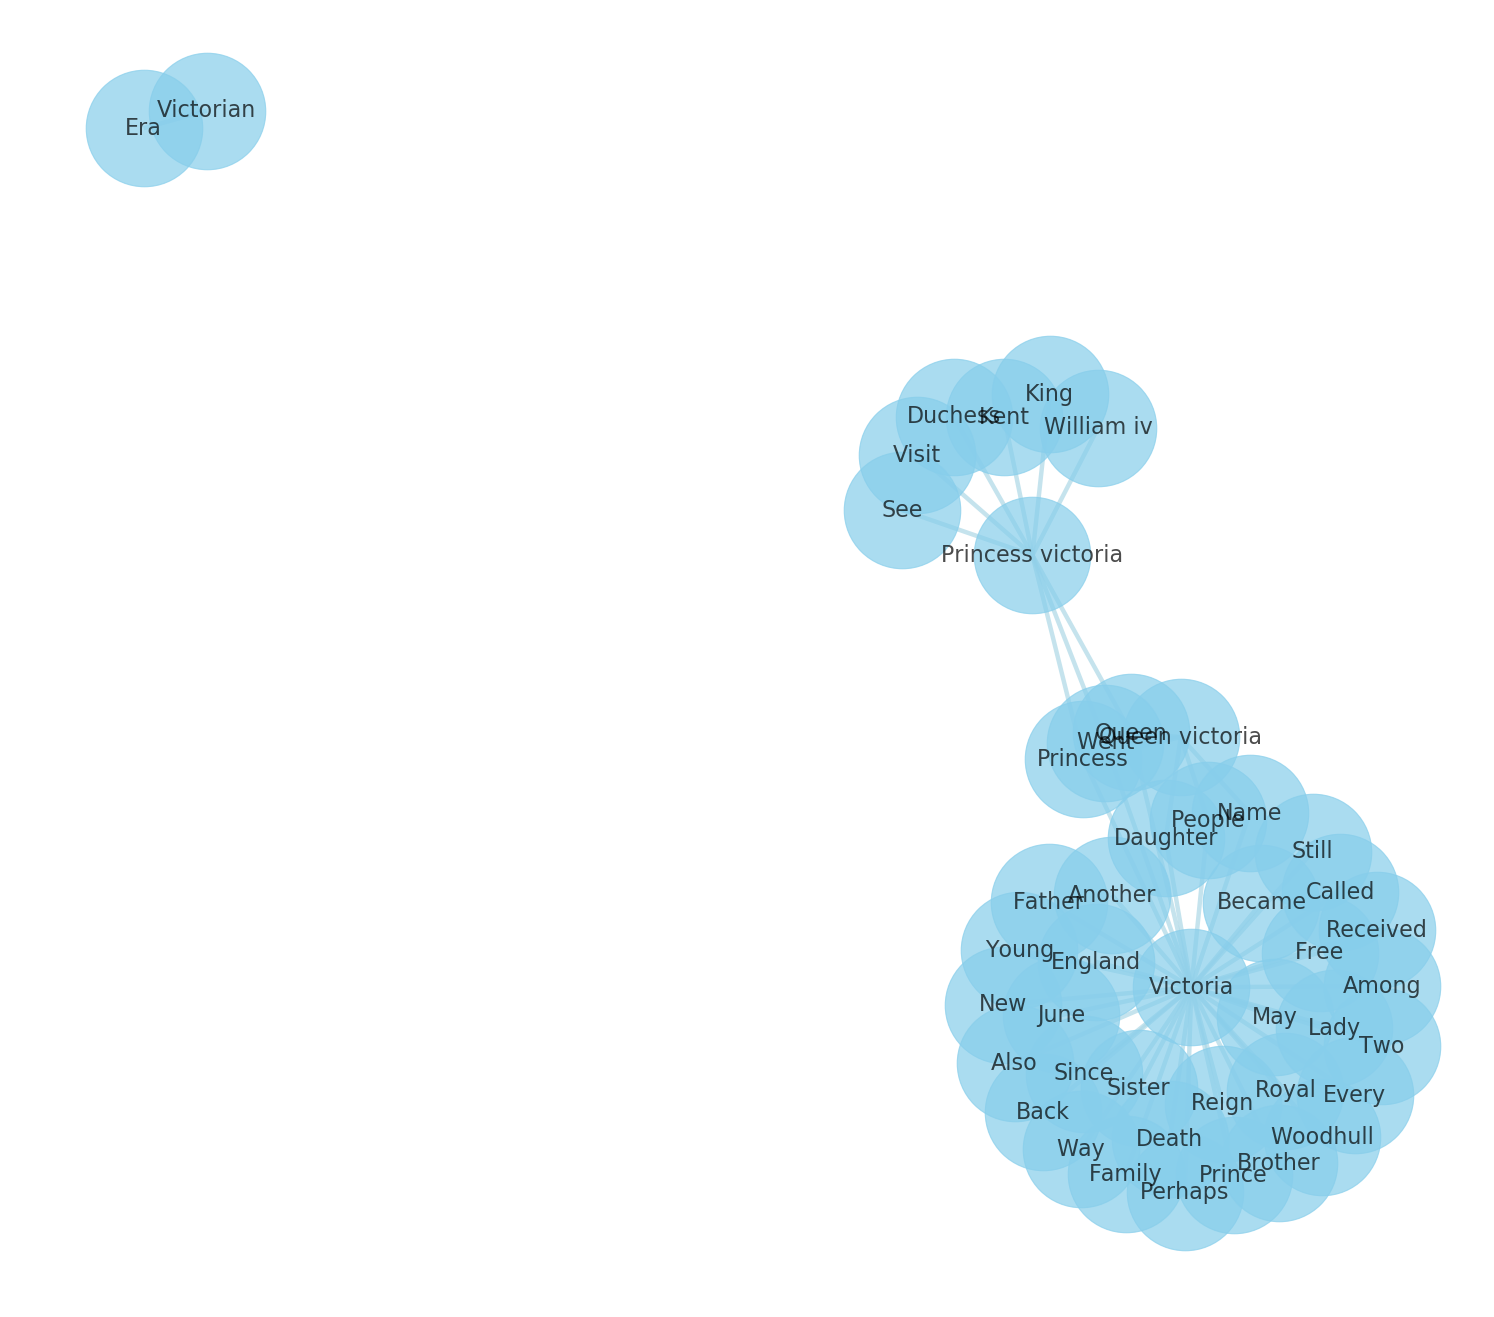

In [568]:
# Graph with Custom nodes:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
#nx.draw(G, with_labels=True, node_size=2000, node_color="skyblue", node_shape="s", alpha=0.5, linewidths=50)
#node_color='skyblue'
#node_color= carac['myvalue'][:-1,]
nx.draw(G, with_labels=True, node_size=11000,edge_color= 'lightblue',
        node_color='skyblue', width=4.0, edge_cmap=plt.cm.Set2, alpha=0.7,cmap=plt.cm.Set2,font_size = 20)
plt.show()